<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#LGBM-training" data-toc-modified-id="LGBM-training-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>LGBM training</a></span><ul class="toc-item"><li><span><a href="#utility" data-toc-modified-id="utility-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>utility</a></span></li><li><span><a href="#hit_type" data-toc-modified-id="hit_type-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>hit_type</a></span></li></ul></li><li><span><a href="#layer-2-LGBM" data-toc-modified-id="layer-2-LGBM-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>layer 2 LGBM</a></span></li></ul></div>

In [1]:
import sys
sys.path.append('..')

In [2]:
from taiko.profile import *
from taiko.database import *

import lightgbm as lgb
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import multiprocessing

Using TensorFlow backend.


In [3]:
record_df = load_record_df()
record_df

,drummer_name,song_id,left_sensor_datetime,right_sensor_datetime,capture_datetime
0,aaaaa,99,L_2018-09-28_111140.csv,R_2018-09-28_111142.csv,capture_2018_09_28_11_11_42
1,aaaaa,1,L_2018-09-28_111304.csv,R_2018-09-28_111305.csv,capture_2018_09_28_11_13_05
2,aaaaa,2,L_2018-09-28_111610.csv,R_2018-09-28_111611.csv,capture_2018_09_28_11_16_11
3,aaaaa,3,L_2018-09-28_111936.csv,R_2018-09-28_111937.csv,capture_2018_09_28_11_19_37
4,aaaaa,4,L_2018-09-28_112353.csv,R_2018-09-28_112355.csv,capture_2018_09_28_11_23_55
5,aaaaa,1,L_2018-09-28_112912.csv,R_2018-09-28_112913.csv,capture_2018_09_28_11_29_13
6,aaaaa,2,L_2018-09-28_113242.csv,R_2018-09-28_113244.csv,capture_2018_09_28_11_32_44
7,aaaaa,3,L_2018-09-28_113531.csv,R_2018-09-28_113532.csv,capture_2018_09_28_11_35_32
8,aaaaa,4,L_2018-09-28_113909.csv,R_2018-09-28_113910.csv,capture_2018_09_28_11_39_10
9,aaaaa,1,L_2018-09-28_114340.csv,R_2018-09-28_114340.csv,capture_2018_09_28_11_43_41


In [4]:
pd.DataFrame(data={
    'drummer_name': get_all_drummers()
})

,drummer_name
0,aaaaa
1,carolyn
2,celiven
3,chris
4,cuxi
5,eve
6,fatfat
7,howeverover
8,john
9,kdchang


In [5]:
create_all_drummer_profiles()

100%|██████████| 12/12 [00:00<00:00, 267.25it/s]


In [6]:
pfs = []
with multiprocessing.Pool() as p:
    drummers = get_all_drummers()
    for id_, pf in tqdm(enumerate(p.imap(get_profile, drummers)), total=len(drummers)):
        pf['who'] = id_
        pfs.append(pf)

pf = pd.concat(pfs, ignore_index=True)
# pf['hit_type'] = pf['hit_type'].transform(transform_hit_type)
pf

100%|██████████| 12/12 [00:00<00:00, 831.35it/s]


,L_A_AI,L_G_AI,L_AX_AI,L_AY_AI,L_AZ_AI,L_GX_AI,L_GY_AI,L_GZ_AI,L_A_MMI,L_G_MMI,...,R_GY_FR,R_GZ_FR,R_AXY_CORR,R_AYZ_CORR,R_AZX_CORR,R_GXY_CORR,R_GYZ_CORR,R_GZX_CORR,hit_type,who
0,1.1179,6.3584,0.2296,0.9755,0.4591,2.9900,0.0286,0.7359,1.1137,5.8956,...,92.6209,15.9058,-0.4480,0.8115,-0.6615,0.9898,0.6426,0.6989,1,0
1,1.1930,6.4696,0.1262,1.0443,0.5109,3.1635,3.0870,0.3900,1.1734,5.7921,...,95.5201,17.3706,-0.2662,0.7442,-0.5566,0.9773,0.7137,0.5983,1,0
2,1.1949,6.9870,0.0717,1.0714,0.4629,3.8910,3.1095,0.4710,1.1926,6.9452,...,62.9151,55.2246,-0.9474,0.9037,-0.9220,0.9141,0.6986,0.5876,1,0
3,1.1890,8.7885,0.0758,1.1069,0.3478,4.4348,-0.0586,-0.5040,1.1975,9.2090,...,56.9001,105.8044,-0.9723,0.6087,-0.6561,0.8661,0.8259,0.9712,1,0
4,1.1731,8.7486,0.0809,1.0946,0.3256,4.6375,-2.9966,-2.1645,1.1829,8.5378,...,81.6193,176.5076,-0.8588,-0.0804,0.1700,0.3495,-0.0101,0.9290,1,0
5,1.1524,8.9013,0.0797,1.0366,0.3963,4.8859,-5.7311,-3.3072,1.1529,8.4637,...,241.4246,163.2202,-0.9103,0.8322,-0.9195,0.7856,-0.6972,-0.1050,1,0
6,1.1097,8.7316,0.1066,0.9208,0.4821,5.0049,-4.7368,-3.0733,1.1223,8.1882,...,255.4596,293.2648,0.1074,0.8114,-0.3292,0.9283,-0.3907,-0.1303,1,0
7,1.0586,9.0919,0.0788,0.7967,0.5785,5.8179,0.2713,-2.6037,1.0417,8.1882,...,601.0376,339.2394,0.1797,0.5642,-0.3914,0.9271,-0.4099,-0.1642,1,0
8,1.1876,10.3568,-0.0912,0.9468,0.5029,7.8933,0.8741,-0.7376,1.1849,9.1313,...,601.0376,339.2394,-0.0088,0.5145,-0.3856,0.9546,-0.5920,-0.4688,1,0
9,1.2753,12.9857,-0.1396,1.0794,0.3098,9.2720,-1.7305,0.7441,1.3826,13.4154,...,601.0376,323.4801,0.1608,0.4315,-0.1637,0.9169,-0.4809,-0.3010,1,0


# LGBM training

## utility

In [7]:
def my_f1_score(y_pred, y):
    y = y.get_label()
    y_pred = y_pred.reshape(len(np.unique(y)), -1).argmax(axis=0)
    return "f1-score", metrics.f1_score(y, y_pred, average="macro"), True

In [8]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [9]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[0, 1, 2, 3, 4, 5], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

## hit_type

In [10]:
train_df = pf.drop('who', axis=1).copy()

x = train_df.drop(['hit_type'], axis=1)
y = train_df['hit_type']

# train / valid / test = 0.4 / 0.4 / 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, random_state=0, test_size=0.5, stratify=y_train)

y_train

12774    2
12693    1
5316     0
13184    4
13294    5
1462     4
7660     5
5817     3
13205    5
5036     5
438      1
4018     6
9141     4
4956     5
928      7
11644    3
2191     3
12707    1
5280     6
5085     5
10899    6
13001    3
5673     1
4899     4
5263     6
4136     7
12577    7
2512     5
1119     1
5867     3
        ..
10180    2
13297    5
6348     1
6126     6
7939     6
3316     2
7775     6
3228     2
9477     6
3978     6
4560     2
8141     7
12493    7
12956    3
10484    4
10448    4
234      6
364      7
12575    7
5189     6
13603    0
10287    3
4386     1
3596     4
1009     1
194      5
3222     2
13429    6
3420     3
8518     2
Name: hit_type, Length: 5537, dtype: int64

In [11]:
train_set = lgb.Dataset(x_train, y_train)
valid_set = lgb.Dataset(x_valid, y_valid, free_raw_data=False)
watchlist = [valid_set]

params = dict({
    'learning_rate': 0.2,
    'application': 'multiclass',
    'num_classes': 8,
#     'min_data_in_leaf': 3,
    'max_depth': 5,
    'num_leaves': 2 ** 5,
    'verbosity': 0,
    'metric': 'None'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist,
                  num_boost_round=500, verbose_eval=10, early_stopping_rounds=100, feval=my_f1_score)
y_pred = model.predict(x_test, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[10]	valid_0's f1-score: 0.892395
[20]	valid_0's f1-score: 0.923044
[30]	valid_0's f1-score: 0.944349
[40]	valid_0's f1-score: 0.953854
[50]	valid_0's f1-score: 0.956722
[60]	valid_0's f1-score: 0.960152
[70]	valid_0's f1-score: 0.964049
[80]	valid_0's f1-score: 0.964649
[90]	valid_0's f1-score: 0.967728
[100]	valid_0's f1-score: 0.969142
[110]	valid_0's f1-score: 0.970303
[120]	valid_0's f1-score: 0.970358
[130]	valid_0's f1-score: 0.971159
[140]	valid_0's f1-score: 0.971995
[150]	valid_0's f1-score: 0.972722
[160]	valid_0's f1-score: 0.972407
[170]	valid_0's f1-score: 0.972797
[180]	valid_0's f1-score: 0.973149
[190]	valid_0's f1-score: 0.973526
[200]	valid_0's f1-score: 0.973897
[210]	valid_0's f1-score: 0.973491
[220]	valid_0's f1-score: 0.973324
[230]	valid_0's f1-score: 0.97338
[240]	valid_0's f1-score: 0.973261
[250]	valid_0's f1-score: 0.973485
[260]	valid_0's f1-score: 0.973652
[270]	valid_0's f1-score: 0.974015
[2

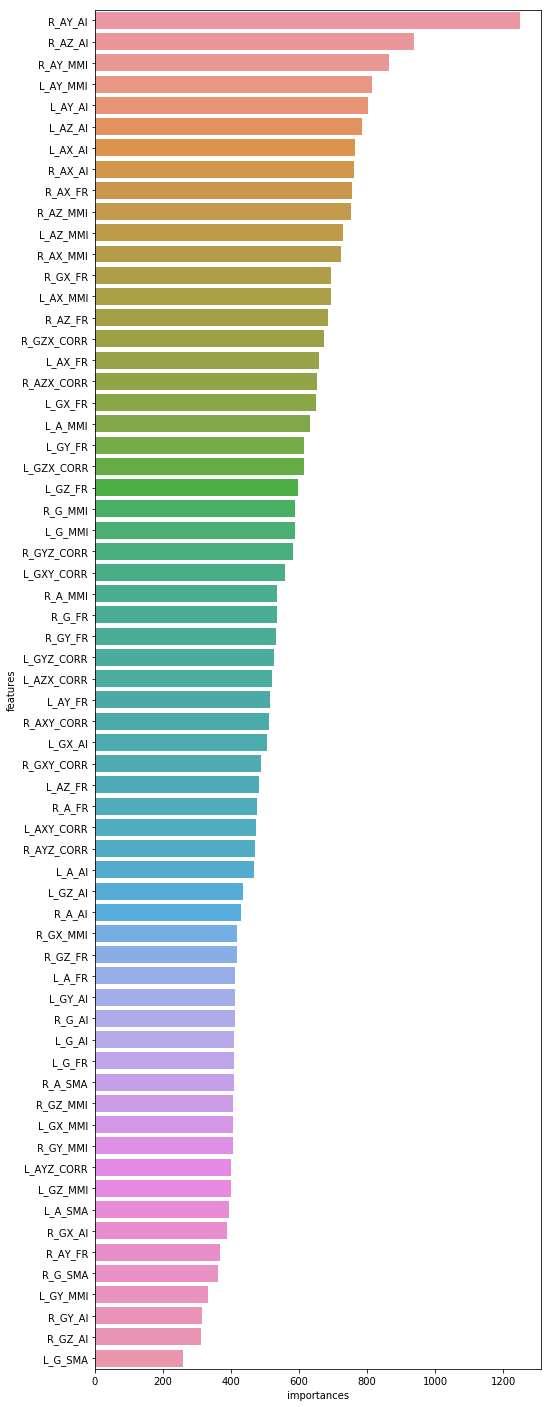

In [12]:
plot_df = pd.DataFrame({'features': train_df.columns[train_df.columns != 'hit_type'],
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)

plt.figure(figsize=(8, 25))
sns.barplot(x = plot_df.importances, y = plot_df.features)
plt.show()

In [13]:
y_preds = []
for y_pred_ in [y_pred]:
    predictions = []
    for x in y_pred_:
        predictions.append(np.argmax(x))
    y_preds.append(pd.Series(data=predictions))

Normalized confusion matrix
[[0.97757848 0.         0.         0.         0.         0.00896861
  0.01345291 0.        ]
 [0.         0.98373984 0.00271003 0.00813008 0.         0.00542005
  0.         0.        ]
 [0.00543478 0.         0.98097826 0.00543478 0.00271739 0.00271739
  0.00271739 0.        ]
 [0.         0.01078167 0.         0.98113208 0.         0.00269542
  0.00539084 0.        ]
 [0.00271003 0.         0.01084011 0.         0.97289973 0.00271003
  0.01084011 0.        ]
 [0.0026738  0.0026738  0.         0.         0.0026738  0.97860963
  0.01336898 0.        ]
 [0.         0.         0.00534759 0.         0.         0.01871658
  0.96791444 0.00802139]
 [0.00623053 0.         0.00311526 0.         0.         0.04361371
  0.00311526 0.94392523]]


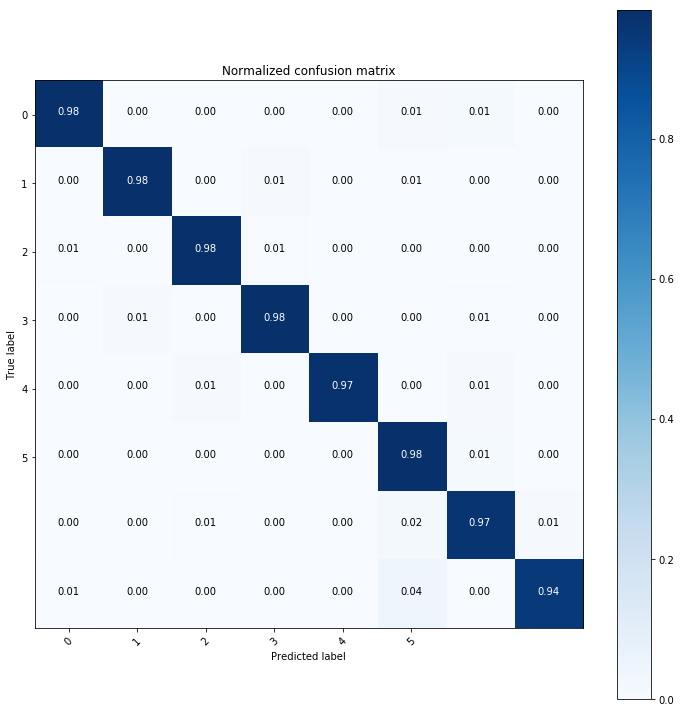

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       223
           1       0.99      0.98      0.99       369
           2       0.98      0.98      0.98       368
           3       0.99      0.98      0.98       371
           4       0.99      0.97      0.98       369
           5       0.93      0.98      0.95       374
           6       0.96      0.97      0.96       374
           7       0.99      0.94      0.97       321

   micro avg       0.97      0.97      0.97      2769
   macro avg       0.97      0.97      0.97      2769
weighted avg       0.97      0.97      0.97      2769

0.9737321132874992


In [14]:
y_tests = [y_test]
for y_pre, y_tst in zip(y_preds, y_tests):
    cutstom_output_cnf_matrix(y_tst, y_pre)
    print(metrics.classification_report(y_tst, y_pre))
    
    print(metrics.f1_score(y_tst, y_pre, average = 'macro'))

In [15]:
model.save_model('lgbm_model.h5')

# layer 2 LGBM

In [16]:
plot_df = pd.DataFrame({'features': model.feature_name(),
                        'importances': model.feature_importance()})
plot_df = plot_df.sort_values('importances', ascending=False)
plot_df = plot_df.head(12)
list(plot_df['features'])

['R_AY_AI',
 'R_AZ_AI',
 'R_AY_MMI',
 'L_AY_MMI',
 'L_AY_AI',
 'L_AZ_AI',
 'L_AX_AI',
 'R_AX_AI',
 'R_AX_FR',
 'R_AZ_MMI',
 'L_AZ_MMI',
 'R_AX_MMI']

In [17]:
train_df = pf.drop('who', axis=1).copy()

x = train_df[list(plot_df['features'])]
y = train_df['hit_type']

# train / valid / test = 0.4 / 0.4 / 0.2
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2, stratify=y)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, random_state=0, test_size=0.5, stratify=y_train)

y_train

12774    2
12693    1
5316     0
13184    4
13294    5
1462     4
7660     5
5817     3
13205    5
5036     5
438      1
4018     6
9141     4
4956     5
928      7
11644    3
2191     3
12707    1
5280     6
5085     5
10899    6
13001    3
5673     1
4899     4
5263     6
4136     7
12577    7
2512     5
1119     1
5867     3
        ..
10180    2
13297    5
6348     1
6126     6
7939     6
3316     2
7775     6
3228     2
9477     6
3978     6
4560     2
8141     7
12493    7
12956    3
10484    4
10448    4
234      6
364      7
12575    7
5189     6
13603    0
10287    3
4386     1
3596     4
1009     1
194      5
3222     2
13429    6
3420     3
8518     2
Name: hit_type, Length: 5537, dtype: int64

In [18]:
train_set = lgb.Dataset(x_train, y_train)
valid_set = lgb.Dataset(x_valid, y_valid, free_raw_data=False)
watchlist = [valid_set]

params = dict({
    'learning_rate': 0.2,
    'application': 'multiclass',
    'num_classes': 8,
#     'min_data_in_leaf': 3,
    'max_depth': 5,
    'num_leaves': 2 ** 5,
    'verbosity': 0,
    'metric': 'None'
})

grid_params = {
    'learning_rate': [0.1, 0.2],
    'max_depth': [8, 10],
}

model = lgb.train(params, train_set=train_set, valid_sets=watchlist,
                  num_boost_round=500, verbose_eval=10, early_stopping_rounds=100, feval=my_f1_score)
y_pred = model.predict(x_test, num_iteration=model.best_iteration)

Training until validation scores don't improve for 100 rounds.
[10]	valid_0's f1-score: 0.828792
[20]	valid_0's f1-score: 0.859912
[30]	valid_0's f1-score: 0.876994
[40]	valid_0's f1-score: 0.891218
[50]	valid_0's f1-score: 0.902305
[60]	valid_0's f1-score: 0.908706
[70]	valid_0's f1-score: 0.915296
[80]	valid_0's f1-score: 0.918667
[90]	valid_0's f1-score: 0.92122
[100]	valid_0's f1-score: 0.923239
[110]	valid_0's f1-score: 0.924654
[120]	valid_0's f1-score: 0.927905
[130]	valid_0's f1-score: 0.929308
[140]	valid_0's f1-score: 0.930541
[150]	valid_0's f1-score: 0.931224
[160]	valid_0's f1-score: 0.933946
[170]	valid_0's f1-score: 0.933721
[180]	valid_0's f1-score: 0.935046
[190]	valid_0's f1-score: 0.934845
[200]	valid_0's f1-score: 0.935207
[210]	valid_0's f1-score: 0.937113
[220]	valid_0's f1-score: 0.938777
[230]	valid_0's f1-score: 0.937681
[240]	valid_0's f1-score: 0.938911
[250]	valid_0's f1-score: 0.939224
[260]	valid_0's f1-score: 0.939059
[270]	valid_0's f1-score: 0.938623
[2

In [19]:
y_preds = []
for y_pred_ in [y_pred]:
    predictions = []
    for x in y_pred_:
        predictions.append(np.argmax(x))
    y_preds.append(pd.Series(data=predictions))

Normalized confusion matrix
[[0.96412556 0.0044843  0.00896861 0.0044843  0.01345291 0.0044843
  0.         0.        ]
 [0.00542005 0.95934959 0.         0.02710027 0.         0.00542005
  0.         0.00271003]
 [0.00815217 0.00271739 0.94836957 0.00271739 0.0326087  0.00271739
  0.00271739 0.        ]
 [0.         0.0458221  0.         0.92991914 0.00269542 0.00808625
  0.01078167 0.00269542]
 [0.00271003 0.         0.02439024 0.00271003 0.95663957 0.00542005
  0.00813008 0.        ]
 [0.00534759 0.         0.00534759 0.01604278 0.         0.9197861
  0.02139037 0.03208556]
 [0.         0.01336898 0.         0.02406417 0.         0.04812834
  0.89572193 0.01871658]
 [0.00623053 0.00934579 0.00311526 0.         0.         0.07165109
  0.01557632 0.894081  ]]


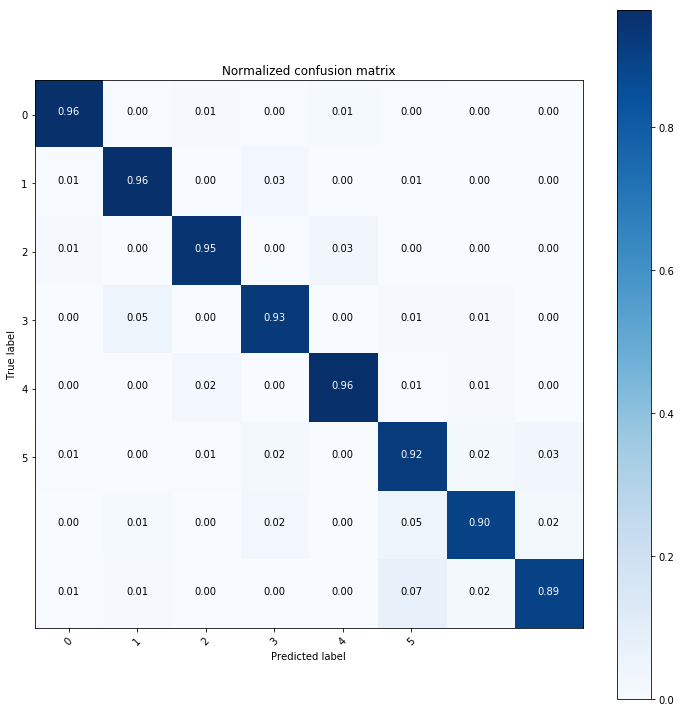

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       223
           1       0.93      0.96      0.94       369
           2       0.96      0.95      0.95       368
           3       0.92      0.93      0.93       371
           4       0.96      0.96      0.96       369
           5       0.87      0.92      0.90       374
           6       0.94      0.90      0.92       374
           7       0.93      0.89      0.91       321

   micro avg       0.93      0.93      0.93      2769
   macro avg       0.93      0.93      0.93      2769
weighted avg       0.93      0.93      0.93      2769

0.9336172352385375


In [20]:
y_tests = [y_test]
for y_pre, y_tst in zip(y_preds, y_tests):
    cutstom_output_cnf_matrix(y_tst, y_pre)
    print(metrics.classification_report(y_tst, y_pre))
    
    print(metrics.f1_score(y_tst, y_pre, average = 'macro'))